#BUSINESS UNDERSTANDING

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 
The goal is to provide data driven insights to the stakeholders to inform safety improvements, risk assessment as well as fleet expansion decisions

The dataset used is obtained from the National Transportation Safety Board (NTSB)that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
From this data set, we aim to identify which aircraft types have the lowest fatality rates and risks in order to venture into this new business endeavour

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('flight.csv')

In [4]:
df.head()

Unnamed: 0     acc.date                                 type       reg  \
0           0   3 Jan 2022  British Aerospace 4121 Jetstream 41    ZS-NRJ   
1           1   4 Jan 2022  British Aerospace 3101 Jetstream 31    HR-AYY   
2           2   5 Jan 2022                       Boeing 737-4H6    EP-CAP   
3           3   8 Jan 2022                  Tupolev Tu-204-100C  RA-64032   
4           4  12 Jan 2022        Beechcraft 200 Super King Air       NaN   

                                        operator fat  \
0                                     SA Airlink   0   
1  LANHSA - Línea Aérea Nacional de Honduras S.A   0   
2                               Caspian Airlines   0   
3                       Cainiao, opb Aviastar-TU   0   
4                                        private   0   

                                            location  dmg  
0                          near Venetia Mine Airport  sub  
1  Roatán-Juan Manuel Gálvez International Airpor...  sub  
2              Isfahan-Shahid Beheshti Airport (IFN)  sub  
3      Hangzhou Xiaoshan International Airport (HGH)  w/o  
4     Machakilha, Toledo District, Grahem Creek area  w/o

In [95]:

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


(2500, 8)

#the initial data has 2500 rows and 8 columns

#ANALYSIS

DATA UNDERSTANDING AND ANALYSIS

As mentioned above, the data is from NTSB for the time period of 1962 to 2023 which encapsulates aviation accidents and incidents over the stipulated time frame.
in this section, we will begin data cleaning which will then enable us in imputation of data.

In [103]:

#CLEANING DATA
df = df.drop_duplicates()


numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace("_", " ")
)


for col in df.columns:
    if "date" in col:
        df[col] = pd.to_datetime(df[col], errors="coerce")

for col in categorical_cols:
    df[col] = df[col].str.strip()



print(df.head())
print(df.info())


   u n n a m e d :   0 a c c . d a t e                              t y p e  \
0                    0      3 Jan 2022  British Aerospace 4121 Jetstream 41   
1                    1      4 Jan 2022  British Aerospace 3101 Jetstream 31   
2                    2      5 Jan 2022                       Boeing 737-4H6   
3                    3      8 Jan 2022                  Tupolev Tu-204-100C   
4                    4     12 Jan 2022        Beechcraft 200 Super King Air   

      r e g                                o p e r a t o r f a t  \
0    ZS-NRJ                                     SA Airlink     0   
1    HR-AYY  LANHSA - Línea Aérea Nacional de Honduras S.A     0   
2    EP-CAP                               Caspian Airlines     0   
3  RA-64032                       Cainiao, opb Aviastar-TU     0   
4    unreg.                                        private     0   

                                     l o c a t i o n d m g  
0                          near Venetia Mine Airport   

In [99]:
df.isnull().sum()

u n n a m e d :   0    0
a c c . d a t e        0
t y p e                0
r e g                  0
o p e r a t o r        0
f a t                  0
l o c a t i o n        0
d m g                  0
dtype: int64

In [100]:
df.columns

Index(['u n n a m e d :   0', 'a c c . d a t e', 't y p e', 'r e g',
       'o p e r a t o r', 'f a t', 'l o c a t i o n', 'd m g'],
      dtype='object')

#cleaning data 1.2

In [ ]:
NOW, WE WILL SHIFT OUR FOCUS TO THE RATE OF FATALITIES ,DAMAGES AND THE TYPES OF AIRCRAFTS INVOLVED TO GET A GOOD GRASP ON WHAT WE ARE WORKING WITH

In [30]:
#here we will primarily focus on fatalities as well as accident date, damages and the type of aircrafts involved
#OPERATOR_FATALITIES

operator_fatalities = df.groupby('operator')['fat'].sum().sort_values(ascending=False).head(10)
print("Operators with Highest Total Fatalities:")
print(operator_fatalities)


Operators with Highest Total Fatalities:
operator
Al Quwwat al-Jawwiya al-Jaza'eriya    516.0
Lion Air                              378.0
Ukraine International Airlines        352.0
Ethiopian Airlines                    314.0
China Eastern Airlines                264.0
Cubana de Aviación, lsf Global Air    224.0
Saratov Airlines                      142.0
Iran Aseman Airlines                  132.0
Sriwijaya Air                         124.0
Russian Air Force                     118.0
Name: fat, dtype: float64


In [31]:
#AIRCRAFT TYPE FATALITIES

type_fatalities = df.groupby('type')['fat'].sum().sort_values(ascending=False).head(10)
print("\nAircraft Types with Highest Total Fatalities:")
print(type_fatalities)


Aircraft Types with Highest Total Fatalities:
type
Boeing 737 MAX 8                         692.0
Ilyushin Il-76TD                         516.0
Boeing 737-8KV (WL)                      352.0
Boeing 737-89P (WL)                      264.0
Boeing 737-201 Advanced                  224.0
Antonov An-148-100B                      142.0
ATR 72-212                               132.0
Boeing 737-524 (WL)                      124.0
Antonov An-26                            106.0
de Havilland Canada DHC-8-402Q Dash 8    104.0
Name: fat, dtype: float64


In [ ]:
DATA ANALYSIS.#FOCUSED EDA

Here, we will begin filtering data further to get a clearer picture of what we are dealing with and hence plot data that will help in the new business venture

In [ ]:
#Ploting data

In [32]:
df['acc.date'] = pd.to_datetime(df['acc.date'], errors = 'coerce')
df['Year'] = df['acc.date'].dt.year

In [16]:
df['fat'] = pd.to_numeric(df['fat'], errors = 'coerce').fillna(0)

In [17]:
df_cleaned = df.dropna(subset=['type'])

DATA ANALYSIS.# ploting, filtering then ploting again to get desirable outputs.

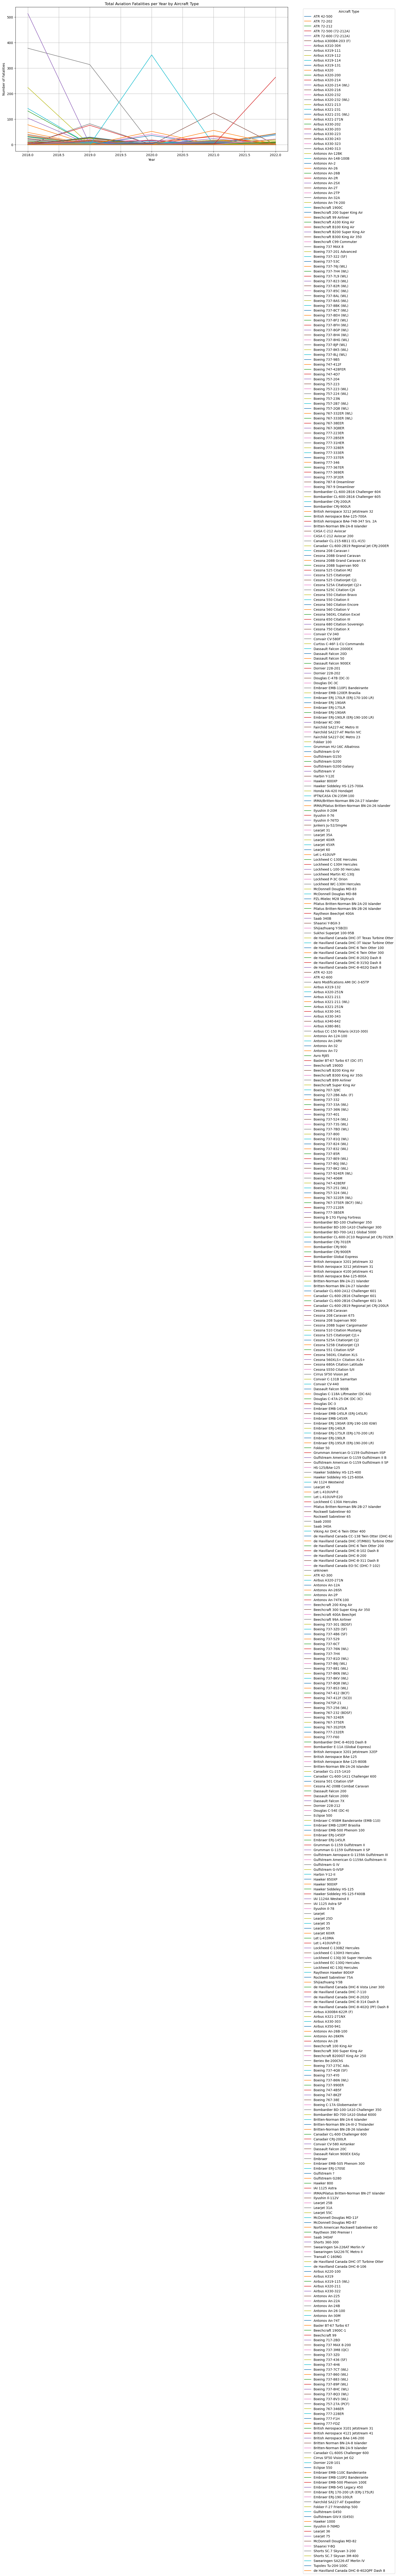

In [22]:
# total fatalities by year and aircraft type to plot the time series
yearly_fatalities_by_type = df_cleaned.groupby(['Year', 'type'])['fat'].sum().unstack().fillna(0)

top_types = df_cleaned['type'].value_counts().head(5).index
# yearly_fatalities_by_type_subset = yearly_fatalities_by_type[top_types]


plt.figure(figsize=(15, 8))

yearly_fatalities_by_type.plot(kind='line', ax=plt.gca(), legend=False)
plt.title('Total Aviation Fatalities per Year by Aircraft Type')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

since the data above is messy, we have to filter some of the data to get a more EDA focused plot

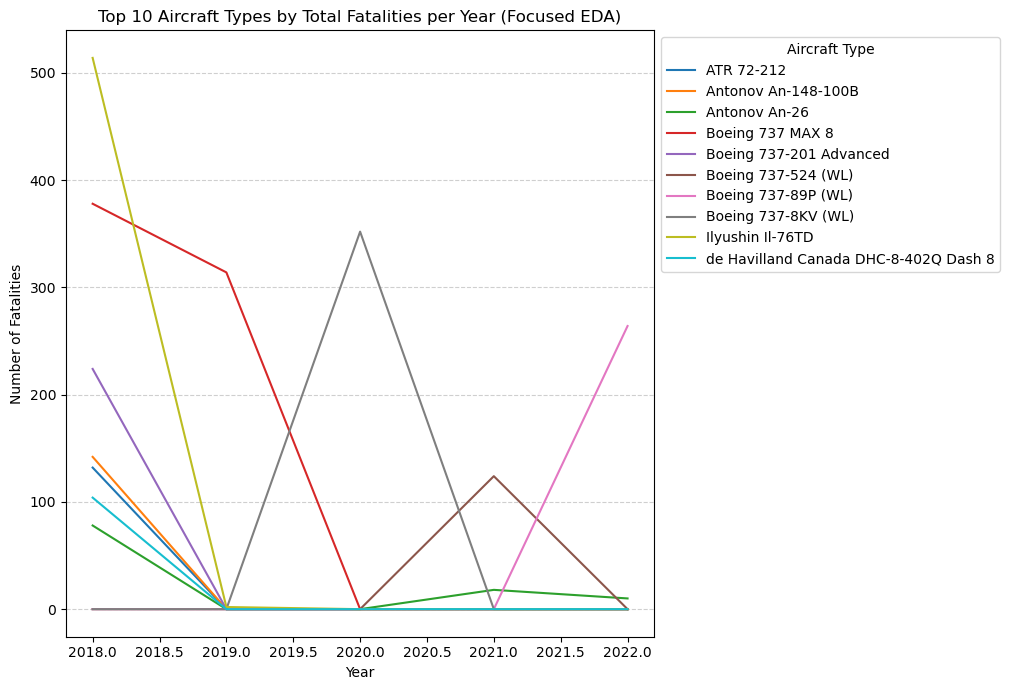

In [34]:
# the top 10 most fatal aircraft types
top_10_types_list = df_cleaned.groupby('type')['fat'].sum().sort_values(ascending=False).head(10).index

#filter
df_top_10 = df_cleaned[df_cleaned['type'].isin(top_10_types_list)]

yearly_fatalities_top_10 = df_top_10.groupby(['Year', 'type'])['fat'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 7))

# filtered data plot
yearly_fatalities_top_10.plot(kind='line', ax=plt.gca())

plt.title('Top 10 Aircraft Types by Total Fatalities per Year (Focused EDA)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')

plt.legend(title='Aircraft Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True, axis='y', linestyle='--', alpha=0.6) 
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

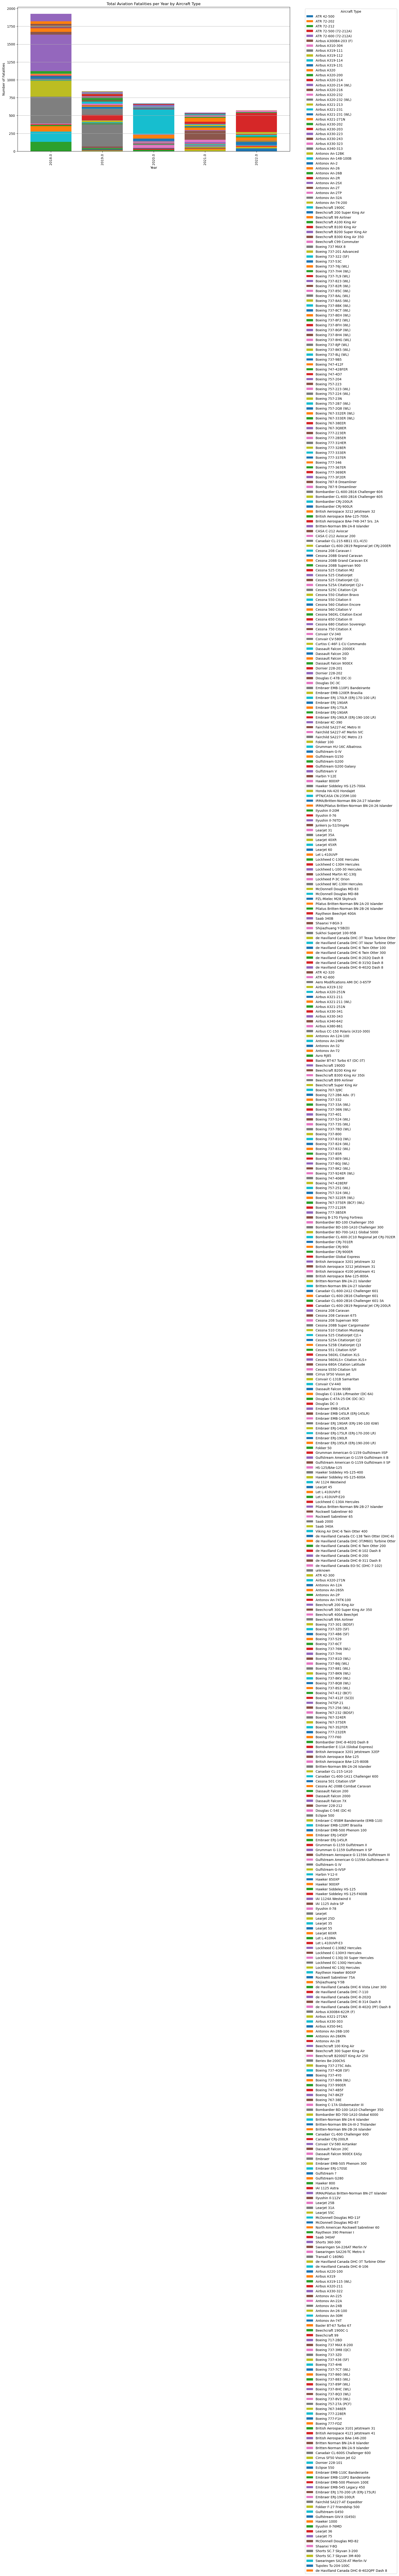

In [28]:

 yearly_fatalities_by_type = df_cleaned.groupby(['Year', 'type'])['fat'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 8))

# Plot a stacked bar chart

yearly_fatalities_by_type.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)

plt.title('Total Aviation Fatalities per Year by Aircraft Type')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y') 
plt.show()

we have to filter the data to render it focused EDA as we did above

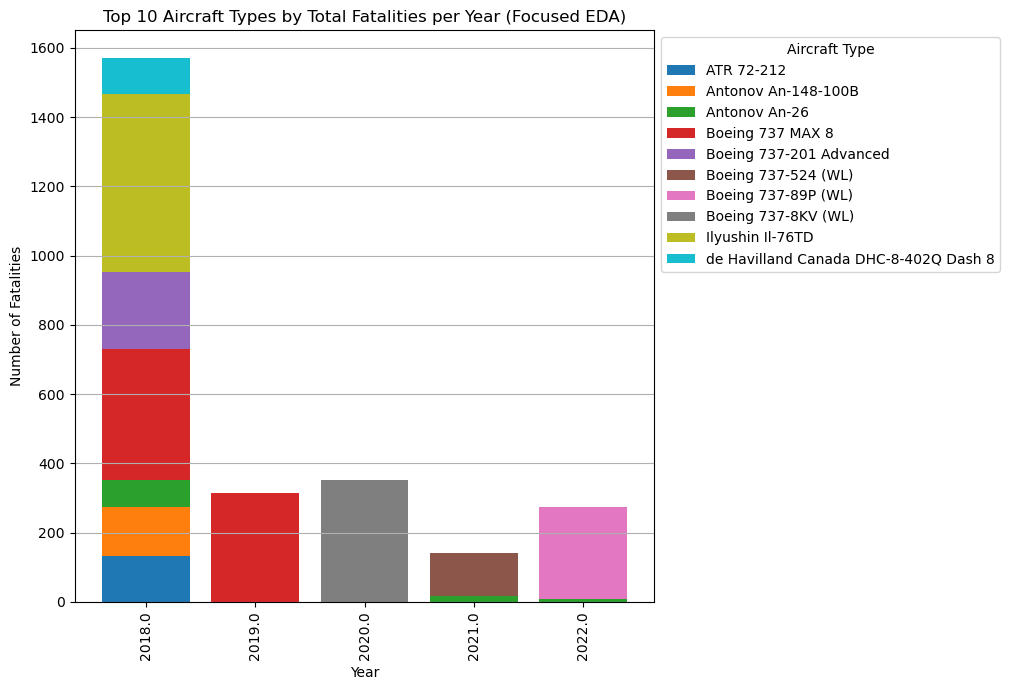

In [35]:
plt.figure(figsize=(12, 7))

# Plot the new, filtered stacked bar chart
yearly_fatalities_top_10.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)

plt.title('Top 10 Aircraft Types by Total Fatalities per Year (Focused EDA)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
# Place the legend in a better position
plt.legend(title='Aircraft Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(axis='y')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

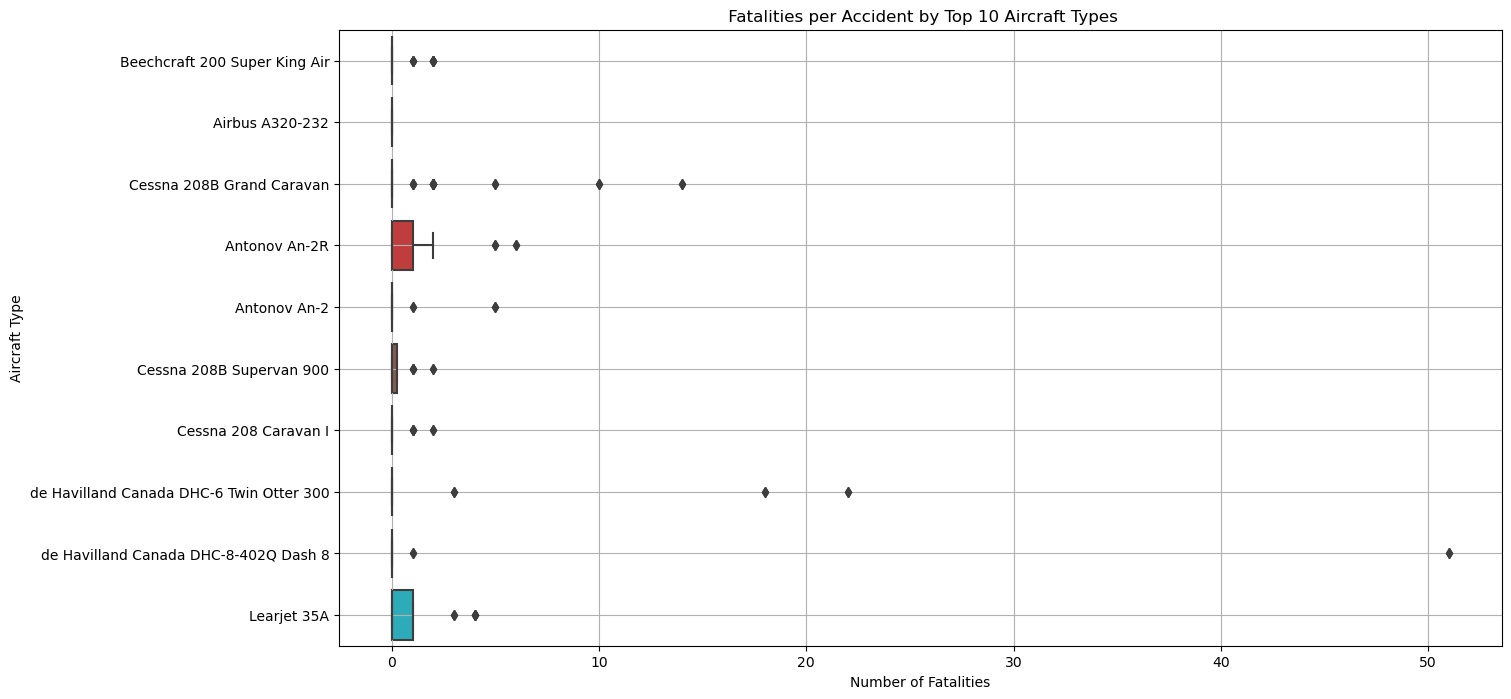

In [24]:
#top 10 most frequent aircraft types for a clearer plot
top_10_types = df_cleaned['type'].value_counts().head(10).index
df_top_types = df_cleaned[df_cleaned['type'].isin(top_10_types)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='fat', y='type', data=df_top_types, orient='h')
plt.title(' Fatalities per Accident by Top 10 Aircraft Types')
plt.xlabel('Number of Fatalities')
plt.ylabel('Aircraft Type')
plt.grid(True)
plt.show()

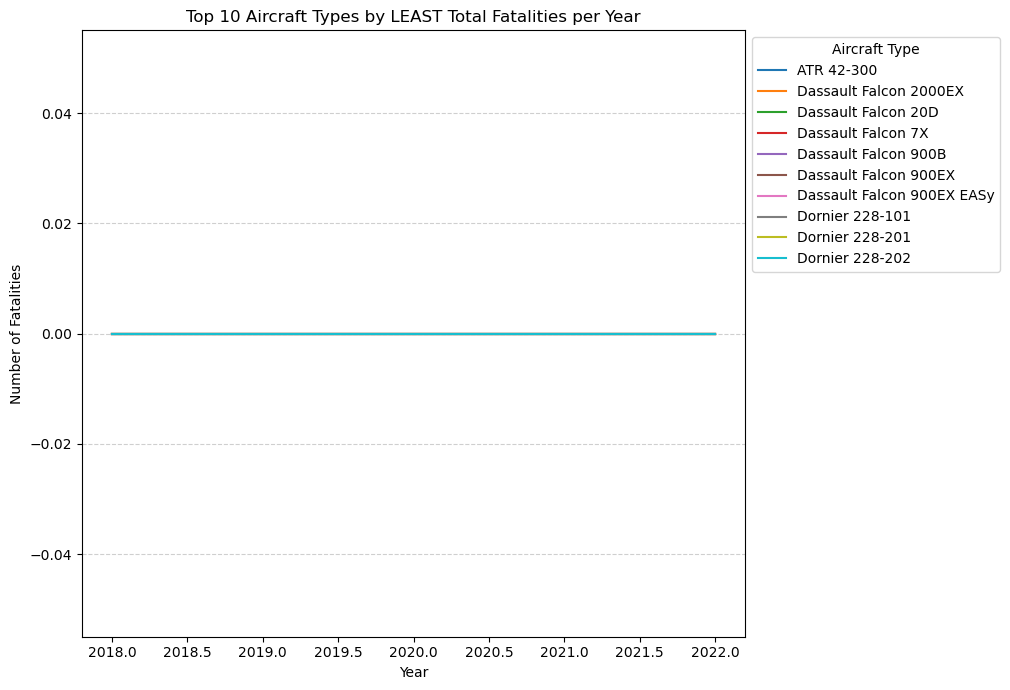

In [36]:
#the bottom 10 aircraft types by total fatalities
least_10_types_list = df_cleaned.groupby('type')['fat'].sum().sort_values(ascending=True).head(10).index

#Filter the original data to include only the least fatal types
df_least_10 = df_cleaned[df_cleaned['type'].isin(least_10_types_list)]

yearly_fatalities_least_10 = df_least_10.groupby(['Year', 'type'])['fat'].sum().unstack().fillna(0)

#Generate the plot
plt.figure(figsize=(12, 7))

# Plot the new, filtered data
yearly_fatalities_least_10.plot(kind='line', ax=plt.gca())

plt.title('Top 10 Aircraft Types by LEAST Total Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend(title='Aircraft Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
CONCLUSIONS AND RECOMMENDATIONS

1. promote the purchase and use of safer aircraft types like the dassault falcon series as well as the dornier 228 series which have exhibited lower fatality rates per accident in their service history i.e we have determined that safety varies by model.

2. Operational standards are crucial - maintenance of the aircrafts in the airline as well as pilot training protocols is important for overal safety.
   

3. Ensure data driven management. as we have done imputation above, sharing of this kind of information acrosss the aviation community wiould really help in preventing accidents in the foreseable future. This entails sharing data with regulatory bodies , other airlines and manufacturers.